In [1]:
#########################
######### ROUTINE TO PLOT THE SEASONAL MEAN OF ANY VARIABLE OVER AN ALREADY 
######### SELECTED REGION.
#########################

import cartopy

import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import numpy as np

import datetime
import pandas

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
#########################
######### DICTIONARIES DEFINITION 
#########################

Range_MLD = {
    'lab' : {
        'vmin' : 20, 
        'vmax' : 2000},
    'gul' : {
        'vmin' : 20, 
        'vmax' : 1000},
    'noe' : {
        'vmin' : 10, 
        'vmax' : 1600},
}


#Colorbar parameters
color_bar = {
    'cmap' : 'YlGnBu',
    'orientation' : 'vertical',
    'title_cbr' : 'depth [m]'
}



reg_ext = {
    'lab': {
        'lon' : (-60, -30),
        'lat' : (50, 65),
        'name' : 'Labrador and Irminger Seas'
    },
    'gul': {
        'lon' : (-75, -45),
        'lat' : (30, 45),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-30, -5),
        'lat' : (45, 60),
        'name' : 'North East Sea'
    }
}

In [3]:
def Grid(data_set):
    x = data_set.longitude
    y = data_set.latitude
    
    x, y = np.meshgrid(x, y)
    return(x, y)


## Function to crop the dataset

def Crops(coord, d_set):
    lon1, lon2 = reg_ext[coord]['lon']
    lat1, lat2 = reg_ext[coord]['lat']
    name_fig = reg_ext[coord]['name']

    return(d_set.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2)))


In [4]:
def Histogram(data_set, n_bins, xlims=None, ylims=None, i=None, ax=None):
    """
        Histogram is a function that helps to make a semi-log plot the histogram 
        of a dataset. The 'y' axis is logaritmic, and the 'x' axis is linear.
        The function accepts a dataset with any kind of values and it filters the
        nan values.
        
        Parameters:
        ------------
            
        data_set : DataArray
            Is the dataset from which we will plot the histogram.
        
        n_bins : integer
            Number of bins for the histogram.
            
        xlims : tuple, float
            The limits for the x axis
        
        ylims : tuple, float
            The limits for the y axis
        
        i : integer
            Is the time step we adre working on. if None, it returns the
            complete array's histogram
            
        ax : axes.Axes object or array of Axes objects
            axes of the n-th sub plot
        
        Output:
        -------
        Plot, Fig.
    """
    
    a = []
    
    if i == None:
        for j in range(len(data_set[:])):
            a = np.append(a, data_set[j])
    else:
        for j in range(len(data_set[i])):
            a = np.append(a, data_set[i, j])

    ##Taking away the nan values
    a2 = No_nan(a)
    ran = (xlims)
        
    if not ax:
        ax = plt.gca()
        
    ax.hist(a2, n_bins, range=ran, alpha=0.75)
    ax.set_yscale("log", nonposy='clip')
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.grid(True)
    
    


    
def No_nan(a):
    """
        No_nan is a function that helps to filter an array from nan values.
        
        Parameters:
        ------------
        a : Numpy Array
            Is the array we want to filter
        
        Output:
        -------
        a2 : Numpy Arrray
            Array with no nan values in it
    """
    nan_array = np.isnan(a)
    not_nan_array = ~ nan_array
    a2 = a[not_nan_array]
    
    return(a2)




In [24]:
def Two_histogram(data_set, it, time, month, n_bins, size, ax=None):
    list_month = [6, 7, 8, 9, 10, 11]
    
    xlim = 10, 2000.
    ylim = 10e-1, 10e6
    
    Histogram(data_set, n_bins, xlim, ylim, it, ax)
    plt.xlabel('MLD (m)')
    plt.ylabel('# of occuped grid points')
    plt.title(time)
    #plt.hlines(size, *xlim)

    if month in list_month:
        xlim2 = 9., 400.
        ylim2 = 10e-1, 10e4

        # this is an inset axes over the main axes
        a = ax.inset_axes([.45, .65, .42, .2])
        Histogram(data_set, n_bins, xlim2, ylim2, it, ax)
        plt.xticks()
        plt.yticks()
        

In [25]:
dir_1 = '/home/lgarcia/Documents/data_ARMOR/'
dir_2 = '/net/alpha/exports/sciences/data/LPO_ISAS/ANA_ISAS15/fld2D/'

fl_n1 = 'ARMOR_*.nc'
fl_n2 = 'ISAS15_DM_2006_2015_MLDS.nc'

c_armor = xr.open_mfdataset(dir_1 + fl_n1)
mld_a = c_armor.mlotst

c_isas = xr.open_mfdataset(dir_2 + fl_n2)
mld_i = c_isas.MLDP


## Here an animation of the histograms

In [26]:
import os
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.use('Agg')

N = int(mld_i.time.size)

print(N)


120


/usr/lib/python3/dist-packages/matplotlib/__init__.py:1352: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [27]:
def generate_one_figure(it=1):
    print(it)

    dir_1 = '/home/lgarcia/Documents/data_ARMOR/'
    dir_2 = '/net/alpha/exports/sciences/data/LPO_ISAS/ANA_ISAS15/fld2D/'

    fl_n1 = 'ARMOR_*.nc'
    fl_n2 = 'ISAS15_DM_2006_2015_MLDS.nc'

    c_armor = xr.open_mfdataset(dir_1 + fl_n1)
    mld_a = c_armor.mlotst
    mld_ac = mld_a.sel(time=slice('2006-01-01', '2015-12-31'))

    c_isas = xr.open_mfdataset(dir_2 + fl_n2)
    mld_i = c_isas.MLDP
    
    coord = 'lab'
    rega = Crops(coord, mld_ac)
    regi = Crops(coord, mld_i)
    
    time = pandas.to_datetime(mld_i[it].time.values)
    month = time.month
    
    monthly_avg = mld_a.resample(time="1MS").mean('time')


    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9,7))
    
    size1 = 60*120
    Two_histogram(monthly_avg, it, time, month, 100, size1, ax[0])
    ax[0].set_title('ARMOR')
    
    size2 = 38*120
    Two_histogram(regi, it, time, month, 100, size2, ax[1])
    ax[1].set_title('ISAS')

    fig.suptitle('Distribution of MLD on the Labrador and Irminger Seas')
    plt.savefig(os.path.abspath(os.path.sep.join([".","dummy_images","Comp-LAB_%0.4d.png" % it])))
    plt.close()
    
    return None



print('Use %i processes' % multiprocessing.cpu_count() ) 

with multiprocessing.Pool() as pool:
    pool.map( generate_one_figure, np.arange(0, 12))  
    
print('finish!')  

##mencoder "mf://dummy_images/Gul_*.png" -mf fps=10 -o Gulf.avi -ovc lavc -lavcopts vcodec=msmpeg4v2:vbitrate=2500
#ffmpeg -r 1.5 -f image2 -s 1920x1080 -i dummy_images/Comp-LAB_%04d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p -q:v 1 Comp-LAB.mp4
#ffmpeg -r 3 -f image2 -s 1920x1080 -i dummy_images/Noe_%04d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p -q:v 1 Noe.mp4

Use 4 processes
0
2
1
3


/usr/local/lib/python3.5/dist-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.5/dist-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.5/dist-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.5/dist-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


4
5
6


/usr/local/lib/python3.5/dist-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.5/dist-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.5/dist-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


7


/usr/local/lib/python3.5/dist-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


8


AttributeError: 'AxesSubplot' object has no attribute 'inset_axes'

AttributeError: 'AxesSubplot' object has no attribute 'inset_axes'

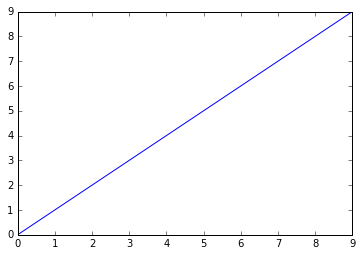